# Task - 1 

# IRIS FLOWER CLASSIFICATION 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import xgboost
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Exploratary Data Analysis

In [8]:
df_num = df.select_dtypes(include = np.number)
df_num

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [9]:
df_cat = df.select_dtypes(include = 'object')
df_cat

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [10]:
df_num.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df_cat.describe()

,Species
count,150
unique,3
top,Iris-setosa
freq,50


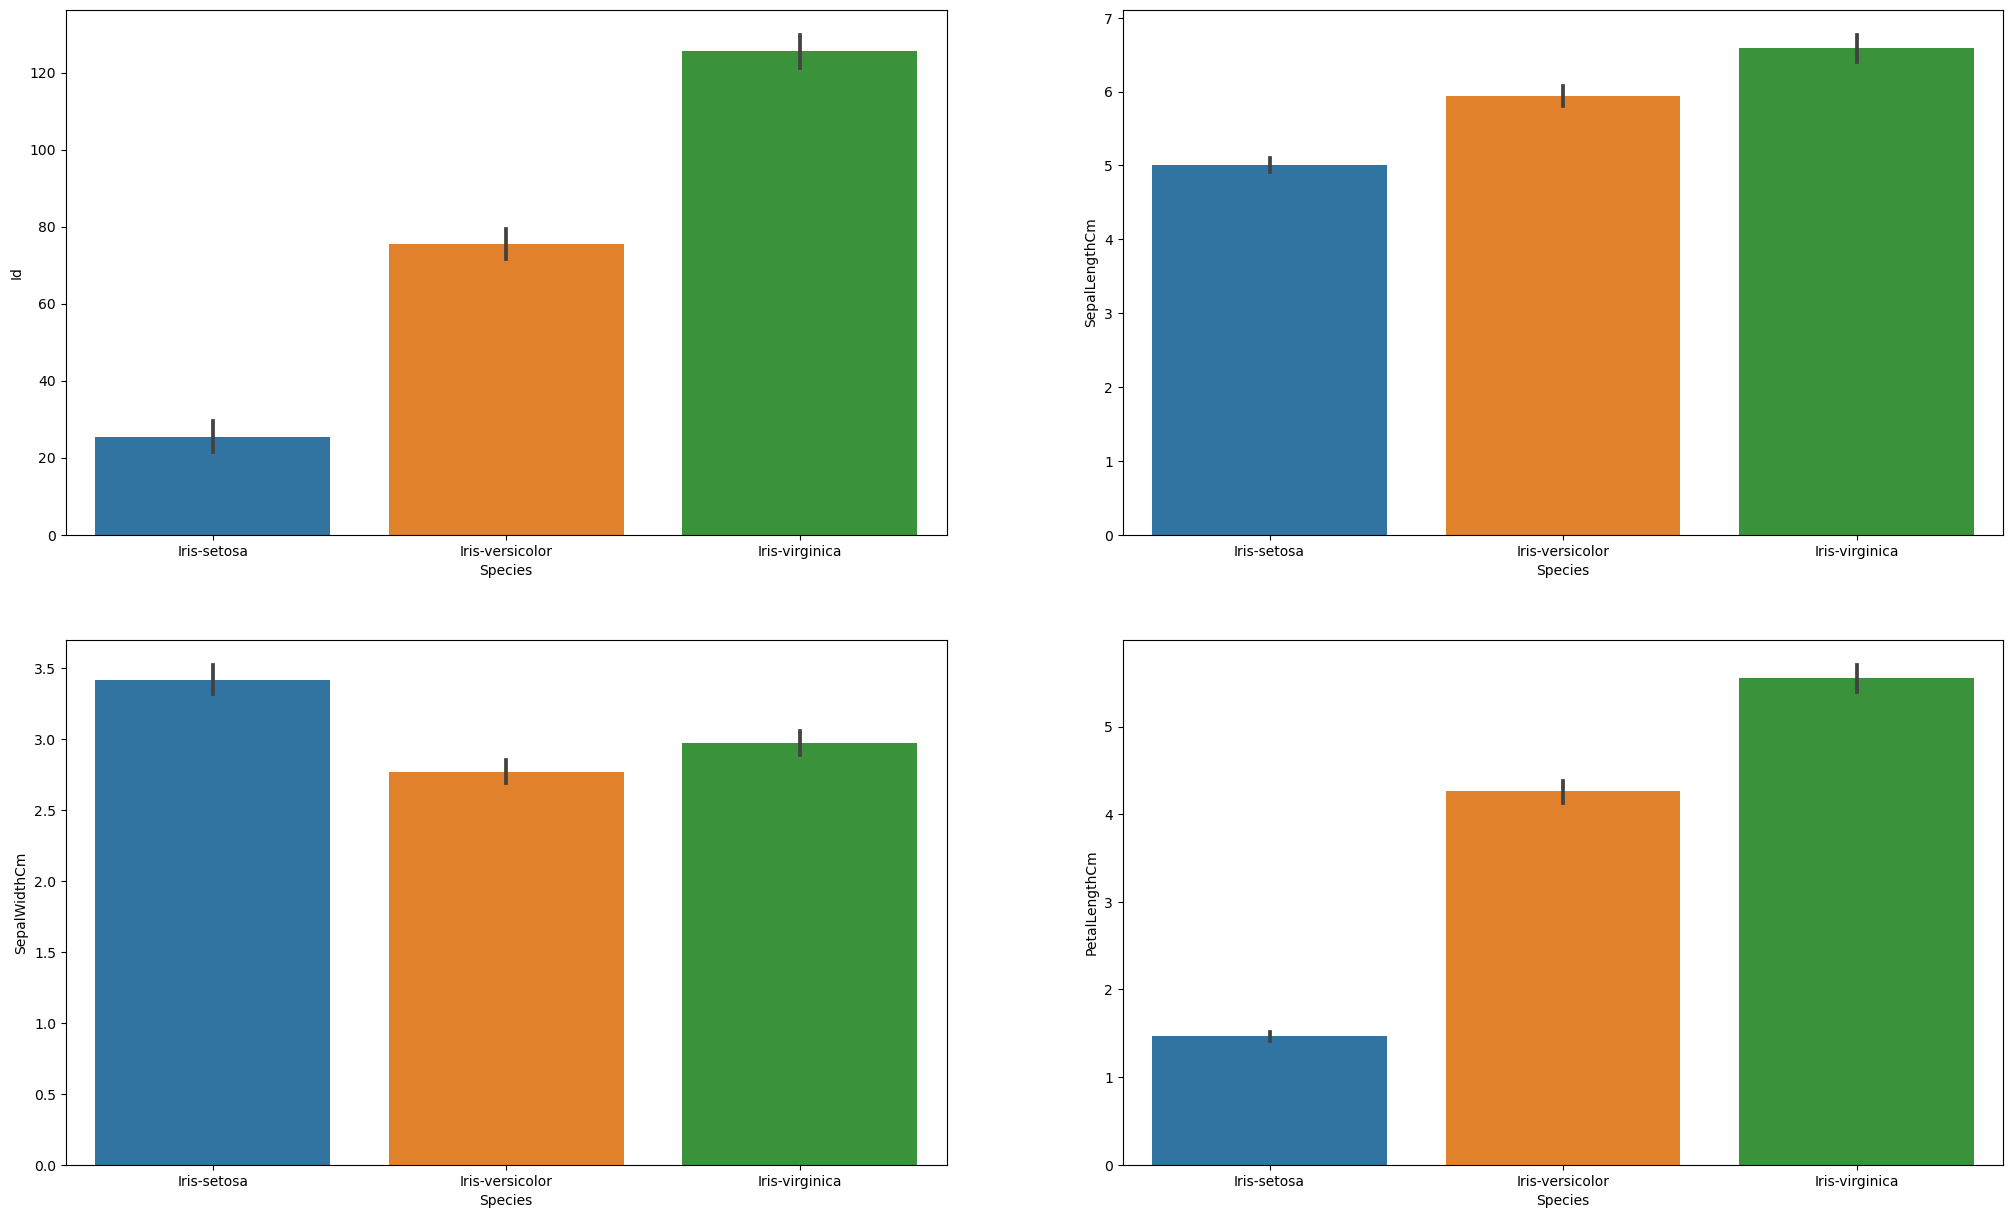

In [12]:
fig,ax = plt.subplots(2,2 ,figsize = (25,15))
for i,subplot in zip(df,ax.flatten()):
    sns.barplot(df['Species'],df[i],ax = subplot)

In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

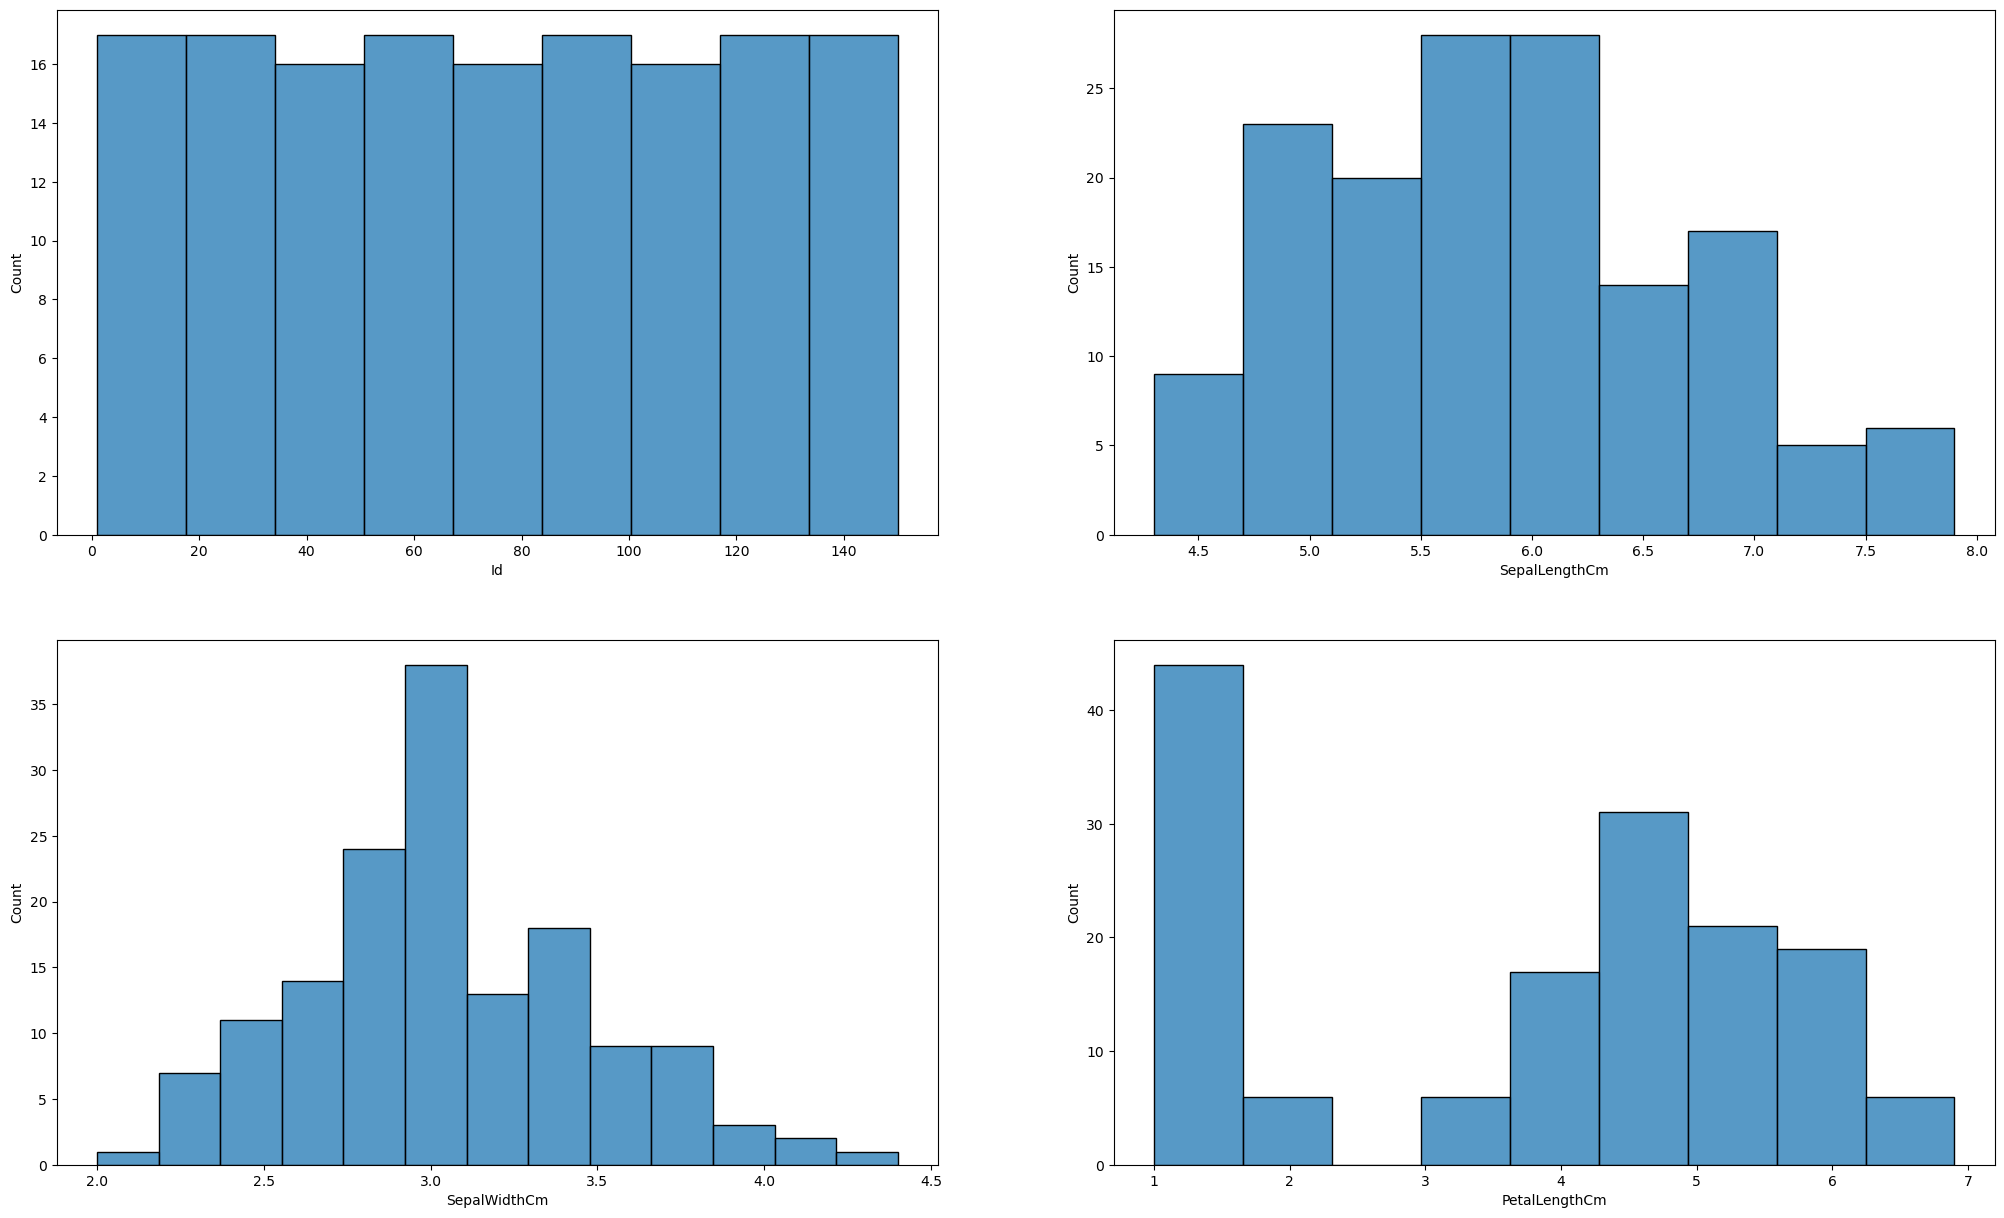

In [14]:
fig,ax = plt.subplots(2,2 ,figsize = (25,15))
for i,subplot in zip(df,ax.flatten()):
    sns.histplot(df[i],ax = subplot)

In [15]:
# Calculate the average size for each species
average_size = df.groupby('Species').mean()[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# Print the average size for each species
print("Average Size for each species:")
average_size

Average Size for each species:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


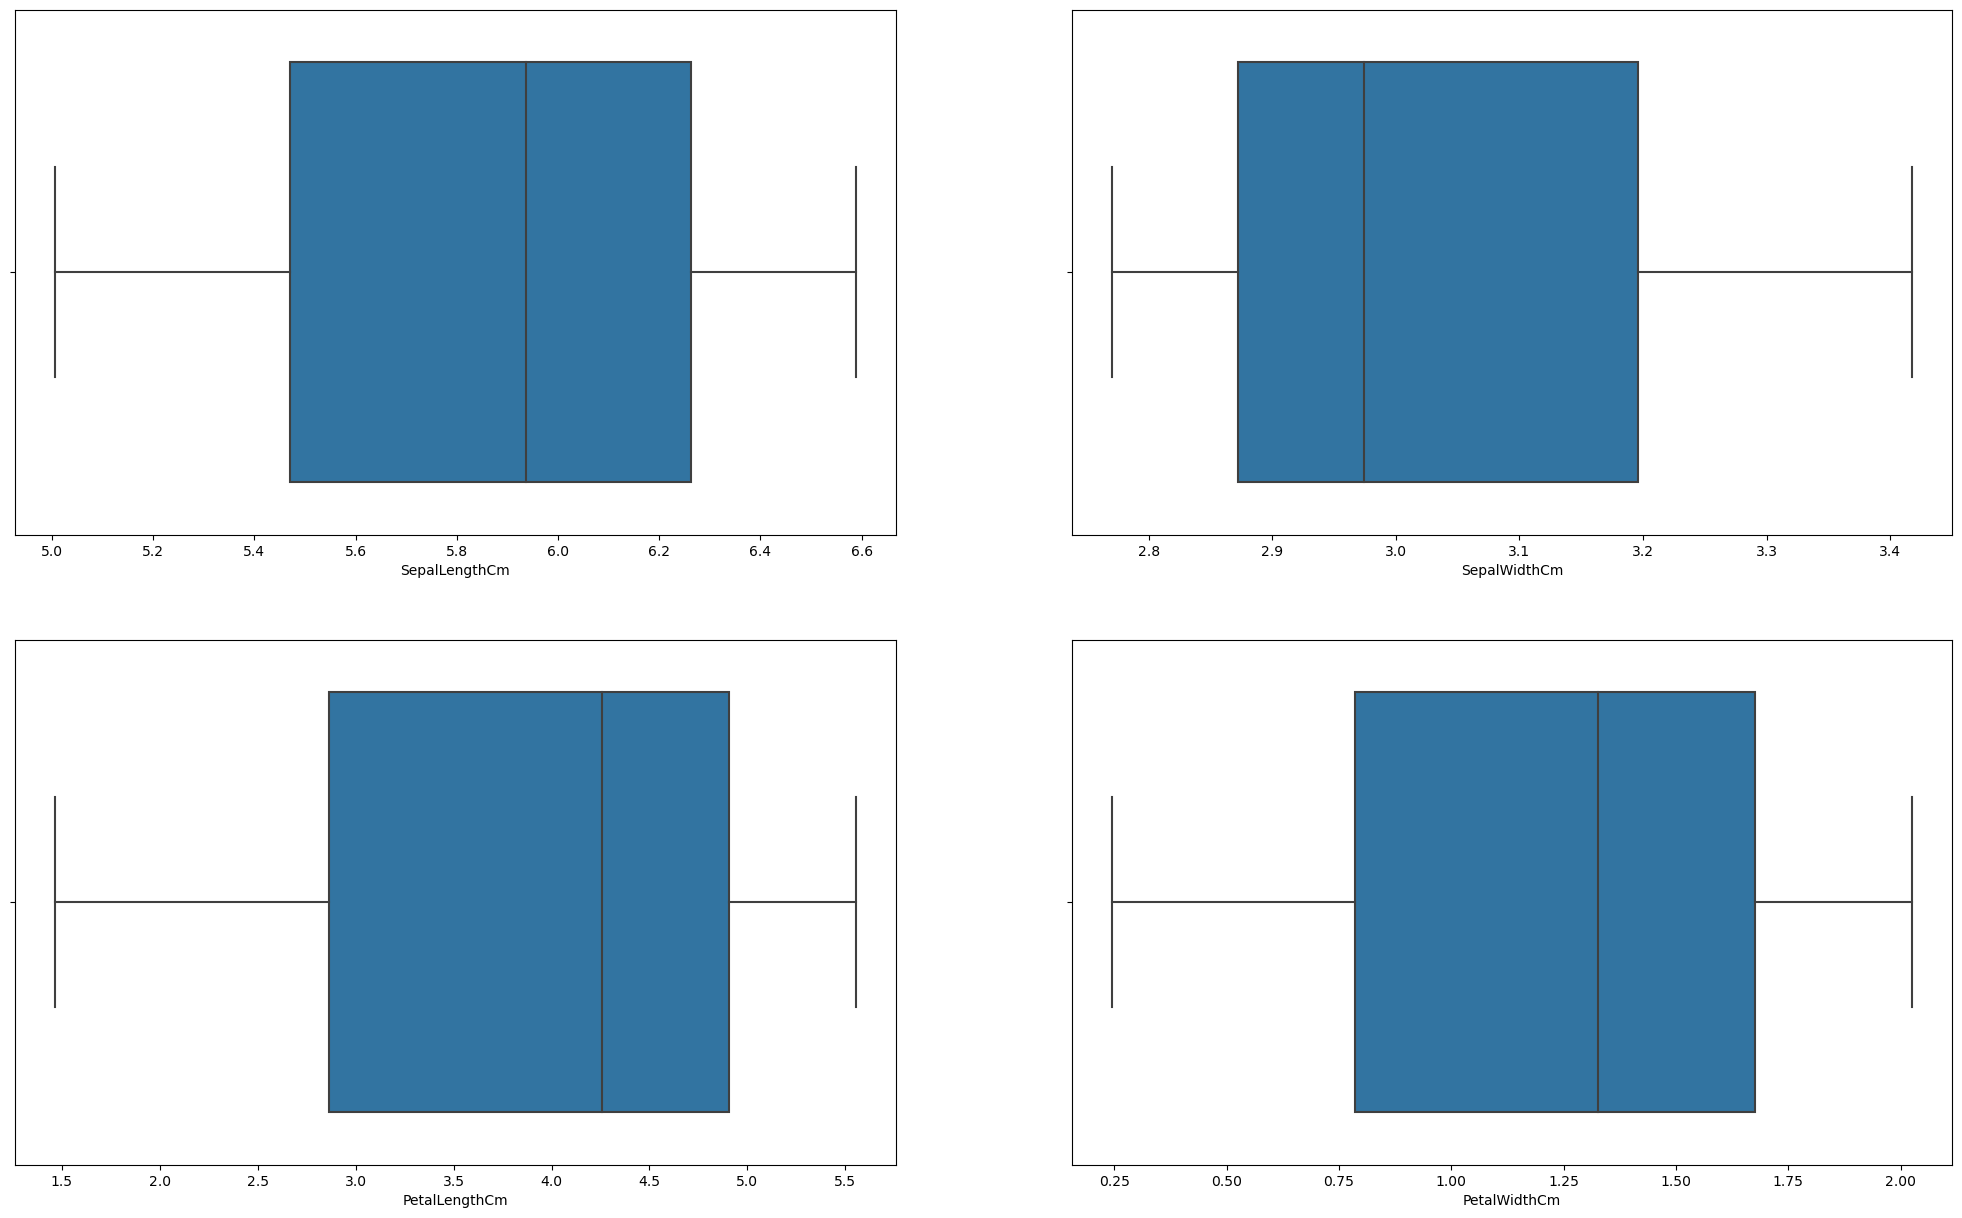

In [16]:
fig,ax = plt.subplots(2,2 ,figsize = (25,15))
for i,subplot in zip(average_size,ax.flatten()):
    sns.boxplot(average_size[i],ax = subplot)

In [17]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
df_1=df.copy()
# Calculate the shape (length-to-width ratio) for each species
df_1['sepal_shape'] = df['SepalWidthCm'] / df['SepalWidthCm']
df_1['petal_shape'] = df['PetalLengthCm'] /df['PetalWidthCm']
average_shape = df_1.groupby('Species').mean()[['sepal_shape', 'petal_shape']]
# Print the average shape for each species
print("\nAverage Shape (Length-to-Width ratio) for each species:")
average_shape


Average Shape (Length-to-Width ratio) for each species:


,sepal_shape,petal_shape
Species,,
Iris-setosa,1.0,7.078000
Iris-versicolor,1.0,3.242837
Iris-virginica,1.0,2.780662


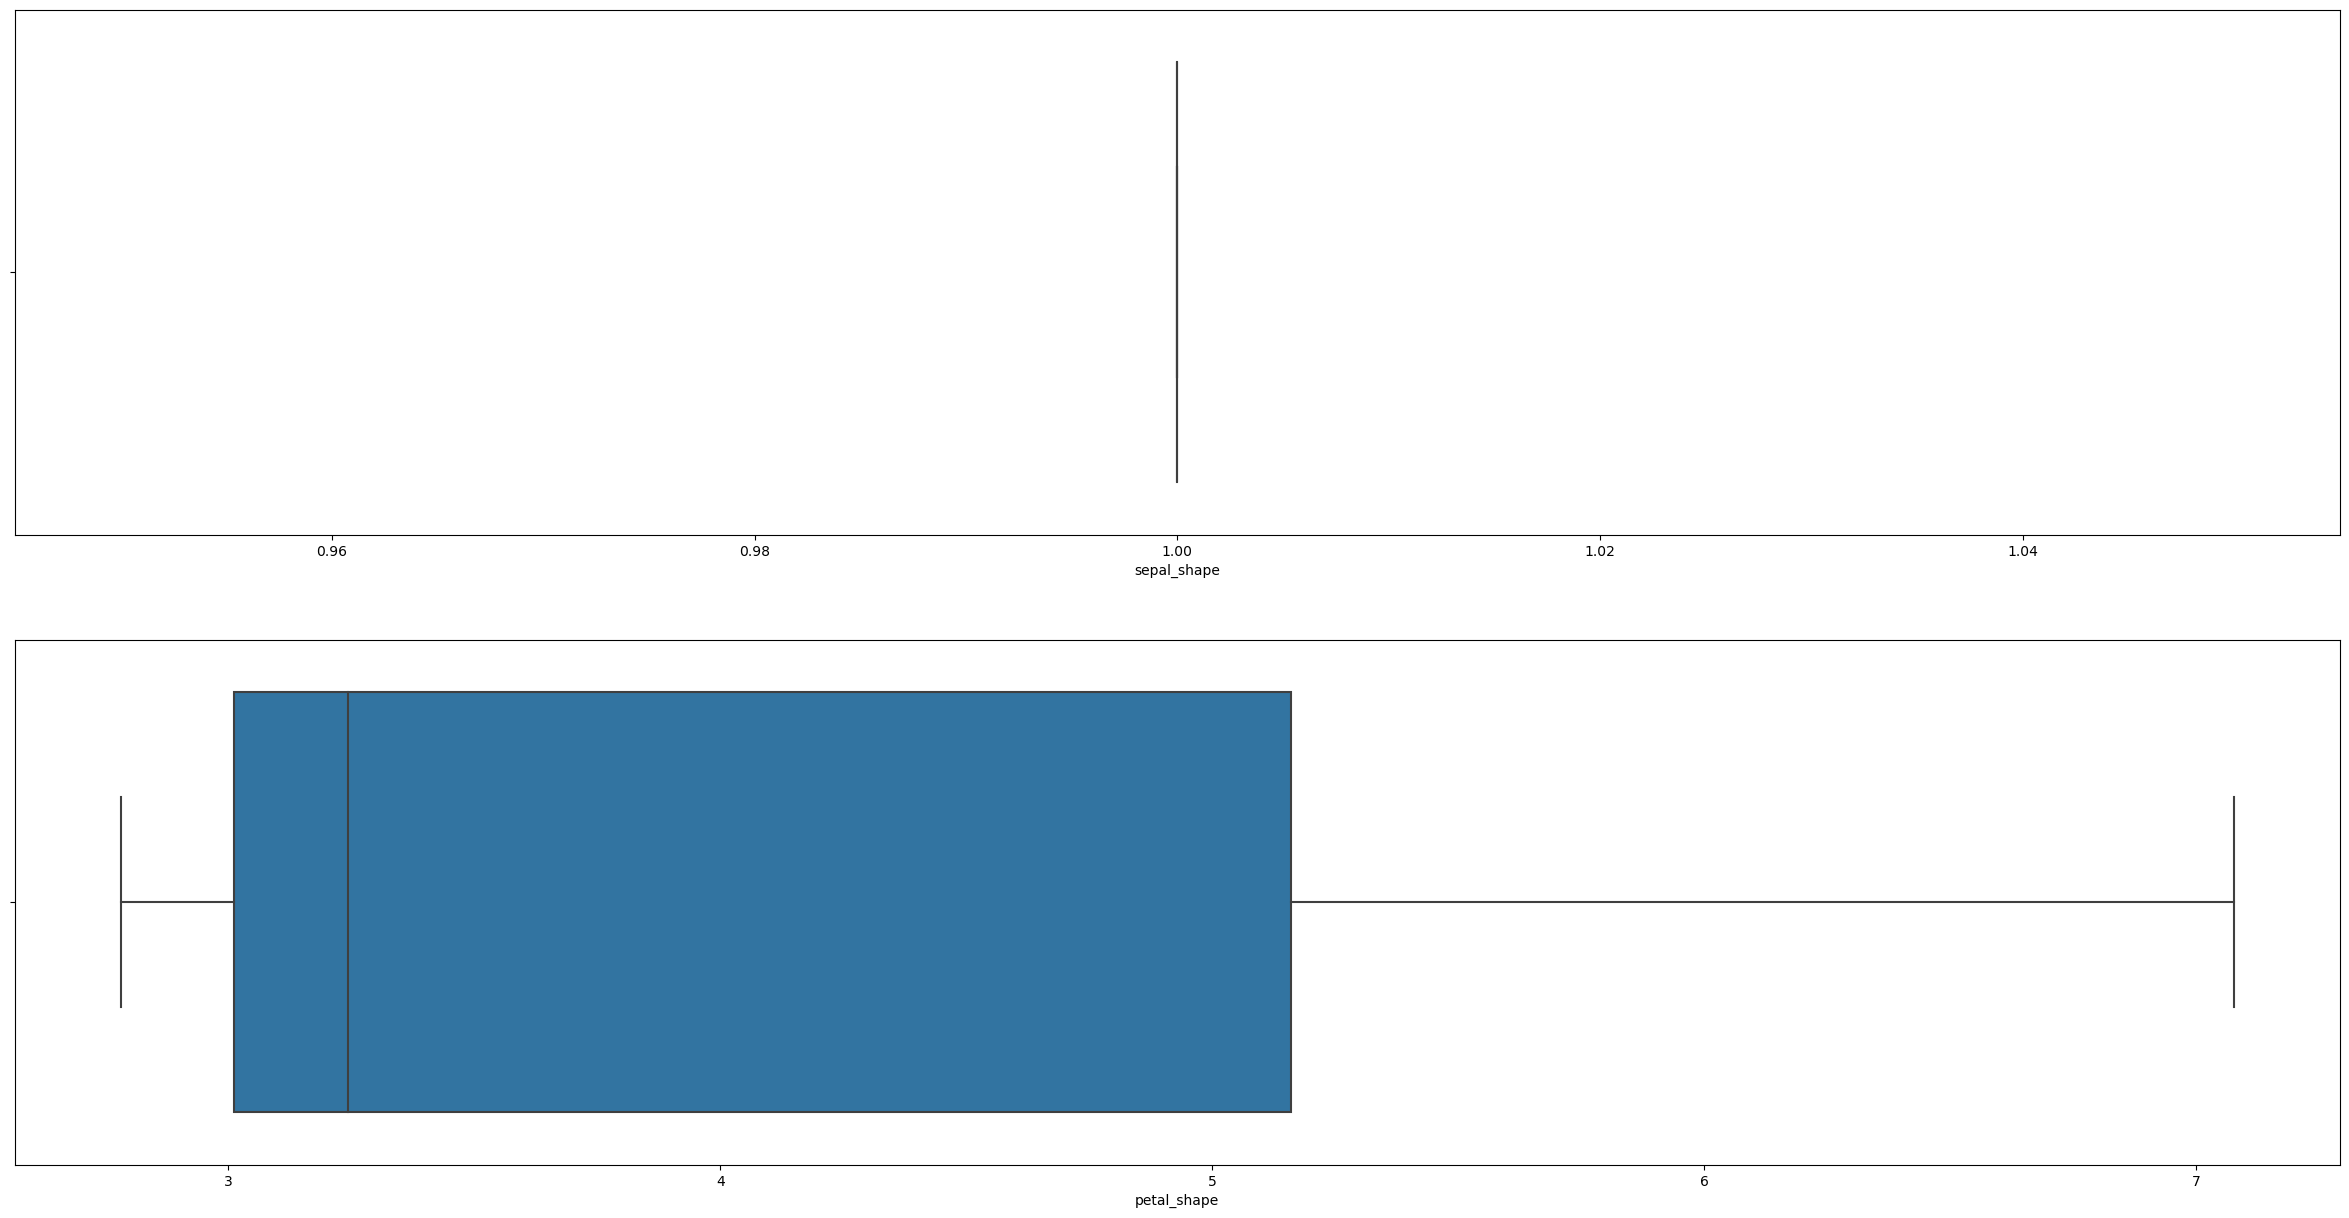

In [19]:
fig,ax = plt.subplots(2,1 ,figsize = (30,15))
for i,subplot in zip(average_shape,ax.flatten()):
    sns.boxplot(average_shape[i],ax = subplot)

<AxesSubplot:>

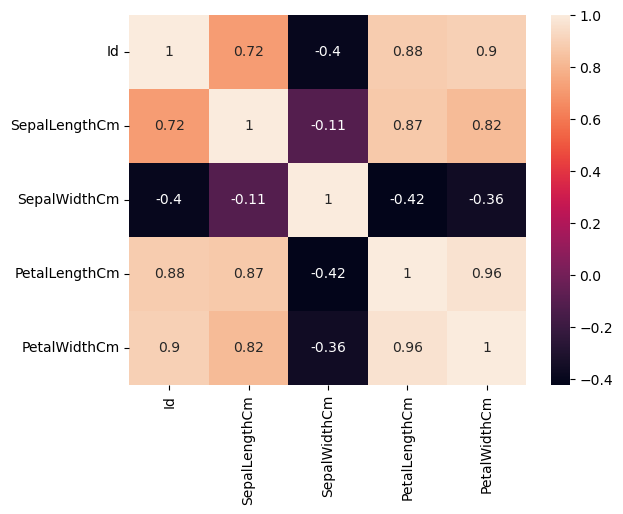

In [20]:
sns.heatmap(df.corr(),annot = True)

In [21]:
df['Species_enc'] = df['Species'].replace({'setosa':1,'versicolor':2,'virginica':3})

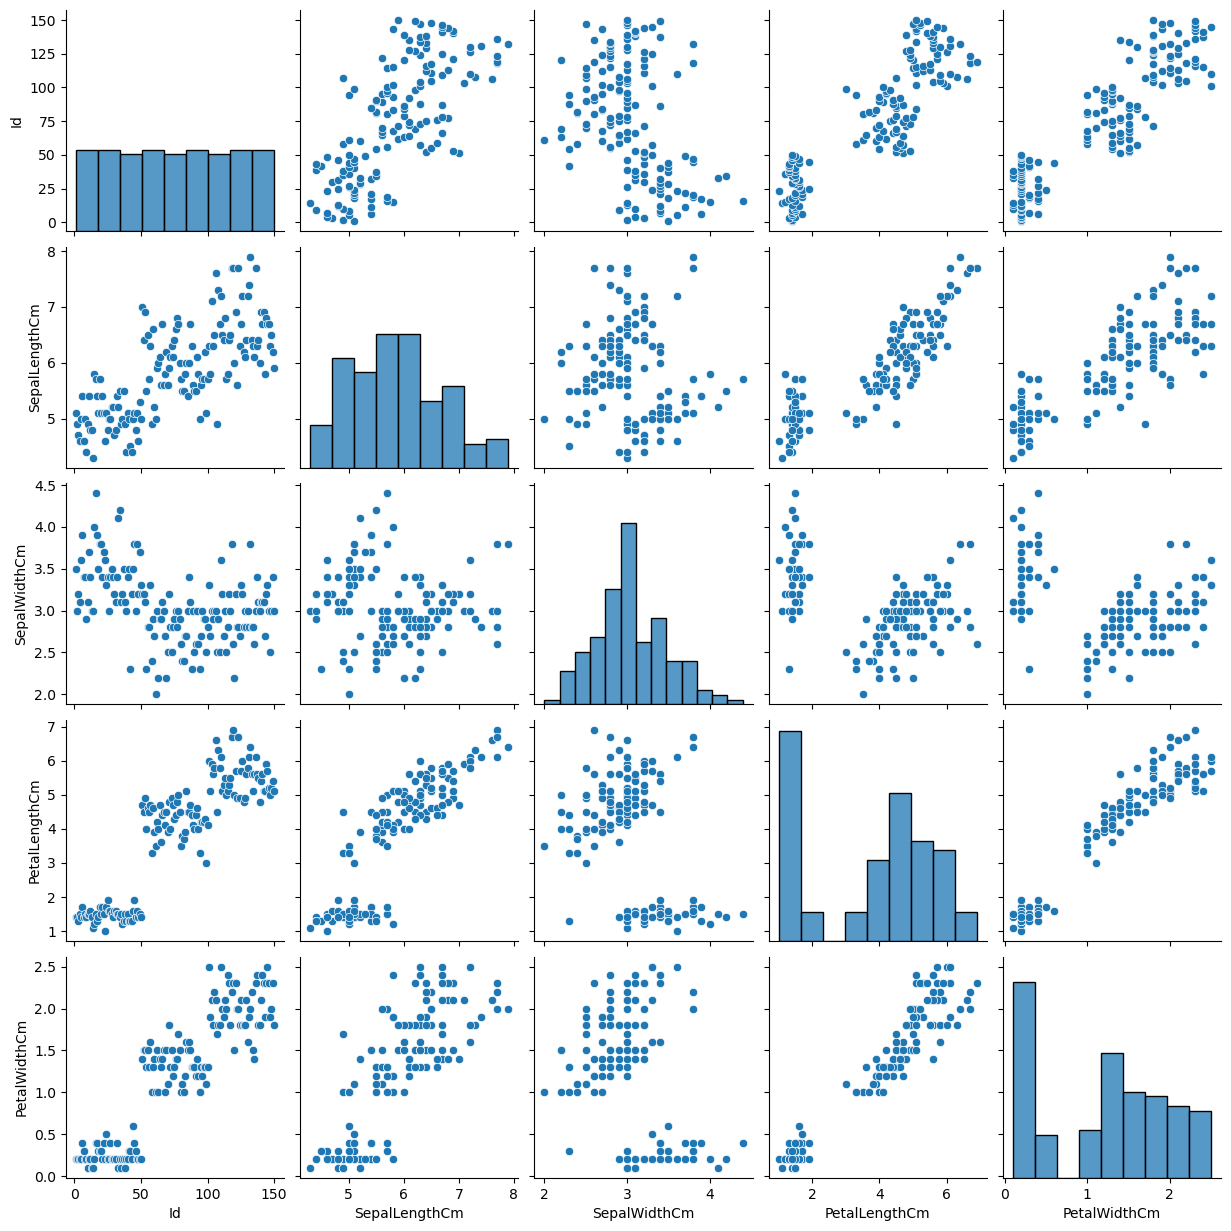

In [22]:
sns.pairplot(df)

# Model Building

In [23]:
X = df.drop(['Species','Species_enc'],axis =1)
y= df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [25]:
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier()
}


accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

# Train and evaluate classification models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    recall_scores.append(rec)
    precision_scores.append(prec)

In [26]:
# Create a DataFrame to store the results
scores_df = pd.DataFrame({
    "Algorithm": models.keys(),
    "Accuracy": accuracy_scores,
    "F1 Score": f1_scores,
    "Recall": recall_scores,
    "Precision": precision_scores
})

# Print the scores DataFrame
scores_df

,Algorithm,Accuracy,F1 Score,Recall,Precision
0,Gaussian NB,1.000000,1.000000,1.000000,1.000000
1,Multinomial NB,0.733333,0.742611,0.733333,0.794613
2,Bernoulli NB,0.200000,0.066667,0.200000,0.040000
3,Logistic Regression,1.000000,1.000000,1.000000,1.000000
4,SVC,0.933333,0.935317,0.933333,0.950000
5,Decision Tree,0.966667,0.967282,0.966667,0.971429
6,KNN,1.000000,1.000000,1.000000,1.000000
7,Bagging CLF,0.966667,0.967282,0.966667,0.971429
8,Random Forest,1.000000,1.000000,1.000000,1.000000
9,Ada Boost,0.966667,0.967282,0.966667,0.971429


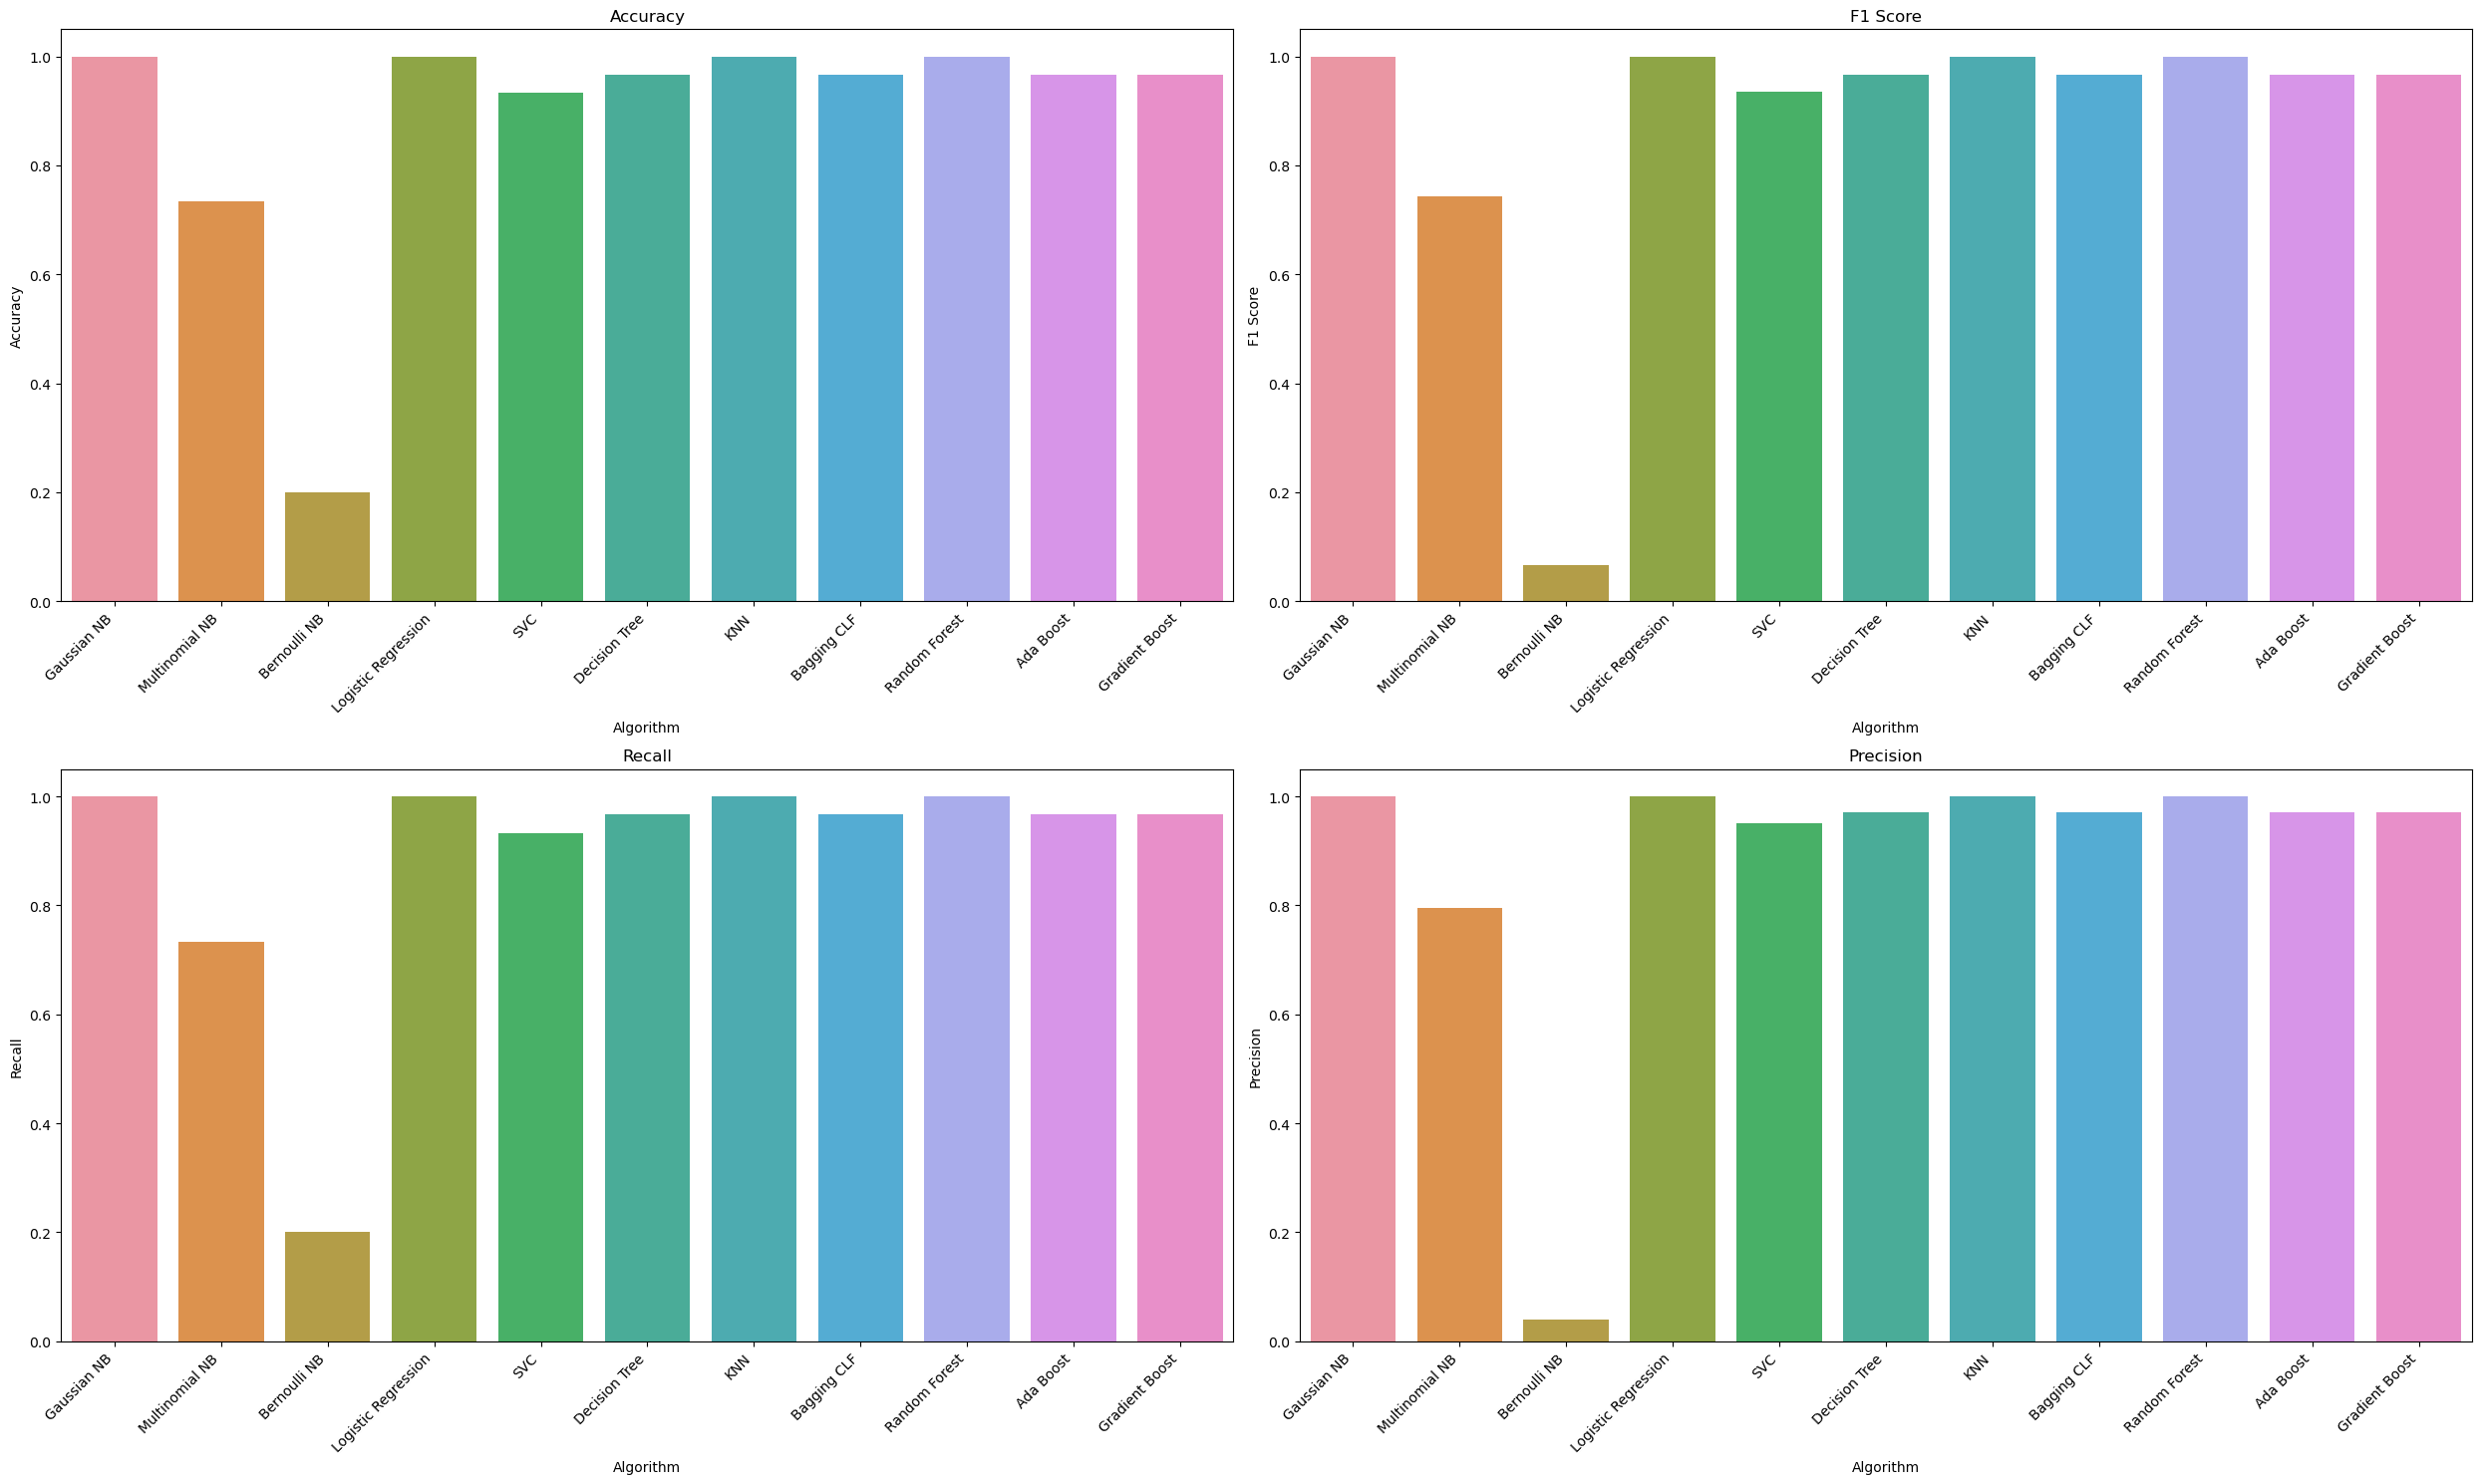

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 subplot layout
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

# Plot Accuracy
sns.barplot(x='Algorithm', y='Accuracy', data=scores_df, ax=ax[0, 0])
ax[0, 0].set_title('Accuracy')

# Plot F1 Score
sns.barplot(x='Algorithm', y='F1 Score', data=scores_df, ax=ax[0, 1])
ax[0, 1].set_title('F1 Score')

# Plot Recall
sns.barplot(x='Algorithm', y='Recall', data=scores_df, ax=ax[1, 0])
ax[1, 0].set_title('Recall')

# Plot Precision
sns.barplot(x='Algorithm', y='Precision', data=scores_df, ax=ax[1, 1])
ax[1, 1].set_title('Precision')

# Rotate the x-axis labels to avoid overlapping
plt.setp(ax[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(ax[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(ax[1, 1].get_xticklabels(), rotation=45, ha='right')

# Add some spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
